# Notebook to visualize the flow of the code

In [1]:
import os
# Change root_path and repo_path to the correct ones
root_path = "./../MonsterRecognition"
repo_path = "./"

train_dir = os.path.join(root_path, "Monster_energy_drink/train")
test_dir = os.path.join(root_path, "Monster_energy_drink/test")
output_train_dir = os.path.join(root_path, "DatasetInference/train")
output_test_dir = os.path.join(root_path, "DatasetInference/test")

output_results = os.path.join(repo_path, "Results")
model_statistics_path = os.path.join(repo_path, "ModelResults/model_statistics.txt")
model_path = os.path.join(repo_path, "ModelResults/trained_model.joblib")
encoder_path = os.path.join(repo_path, "ModelResults/label_encoder.pkl")

images_folder = os.path.join(repo_path, "Images")
output_folder = repo_path
cropped_folder = os.path.join(output_folder, "ImageCropped")    

image_name = "tris2.JPG"

### Histograms 
Histograms are extracted from train and test dataset. These are the features to train the MLP model used to classify cans based on their color.

In [13]:
import pandas as pd

# Load the CSV file into a DataFrame
train_hist_path = os.path.join(output_results, 'train_histograms_features.csv')
train_histograms = pd.read_csv(train_hist_path)
print("Example of Train histogram: \n",train_histograms.head())
print("\nShape: ",train_histograms.shape)

Example of Train histogram: 
     Bin_R1   Bin_R2  Bin_R3  Bin_R4  Bin_R5  Bin_R6   Bin_R7   Bin_R8  Bin_R9  \
0    635.0    623.0   665.0   592.0   465.0   437.0    510.0    535.0   484.0   
1    235.0    350.0   414.0   440.0   594.0   906.0   1577.0   2427.0  3658.0   
2    327.0    605.0  2524.0  5664.0  5199.0  6471.0  24989.0  12377.0  7366.0   
3   9266.0   2034.0  1419.0  1251.0   959.0   968.0   1068.0   1261.0  1200.0   
4  15657.0  12144.0  7134.0  7332.0  7862.0  6812.0   5278.0   3989.0  2854.0   

   Bin_R10  ...  Bin_V29  Bin_V30  Bin_V31  Bin_V32  GLCM_Contrast  \
0    549.0  ...    303.0    265.0    229.0   1765.0     521.660157   
1   5288.0  ...   5634.0   7121.0   8375.0  17560.0     901.549020   
2   6114.0  ...    751.0    461.0    466.0    570.0     145.742771   
3   1137.0  ...   3524.0   3943.0   4431.0  11809.0     376.260199   
4   2002.0  ...   1685.0   1286.0   1124.0   1789.0     247.045409   

   GLCM_Dissimilarity  GLCM_Homogeneity  GLCM_Energy  GLCM_Cor

### Model
The model is trained with features contained in histograms. After the train phase in main.py the model metrics are saved. Thanks to this step you can load the file and use the parameters to classify the data.

In [14]:
from joblib import load
import pickle
model = load(model_path)
with open(encoder_path, 'rb') as f:
    label_encoder = pickle.load(f)
print("Model and encoder loaded")

FileNotFoundError: [Errno 2] No such file or directory: './ModelResults/trained_model.joblib'

In [15]:
# Load the model statistics
with open(model_statistics_path, 'r') as file:
    model_statistics = file.read()

print("Model Statistics:\n", model_statistics)



Model Statistics:
 Accuracy: 85.85%

Classification Report:
                         precision    recall  f1-score   support

                Assault       1.00      1.00      1.00        13
        Aussie Lemonade       0.71      0.95      0.81        55
               Espresso       1.00      1.00      1.00        13
                 Import       0.95      0.95      0.95        37
       Java Triple Shot       0.98      1.00      0.99        55
                Khaotic       0.94      1.00      0.97        50
         Lewis Hamilton       1.00      1.00      1.00        17
                  MIXXD       1.00      0.97      0.98        32
                   MULE       0.99      1.00      0.99        84
             Mango Loco       0.75      0.69      0.72        48
                Monarch       1.00      0.98      0.99        53
      Orange Dreamsicle       1.00      1.00      1.00        94
         Original green       0.74      0.61      0.67        41
          Pacific Punch      

### Load Image to classify

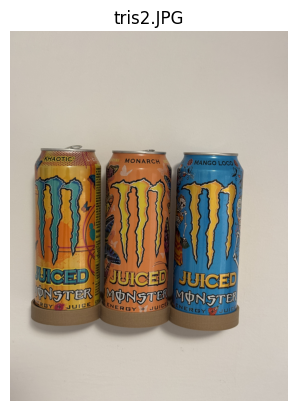

In [5]:
from PIL import Image

import matplotlib.pyplot as plt

# Load the image
image_path = os.path.join(images_folder, image_name)
image = Image.open(image_path)

# Rotate the image by -90 degrees
rotated_image = image.rotate(-90, expand=True)

# Visualize the rotated image
plt.imshow(rotated_image)
plt.axis('off')  # Hide the axis
plt.title(image_name)
plt.show()

### Bounding Box
With run_inference function we can extract bounding box from the image and save new images with single cans. 

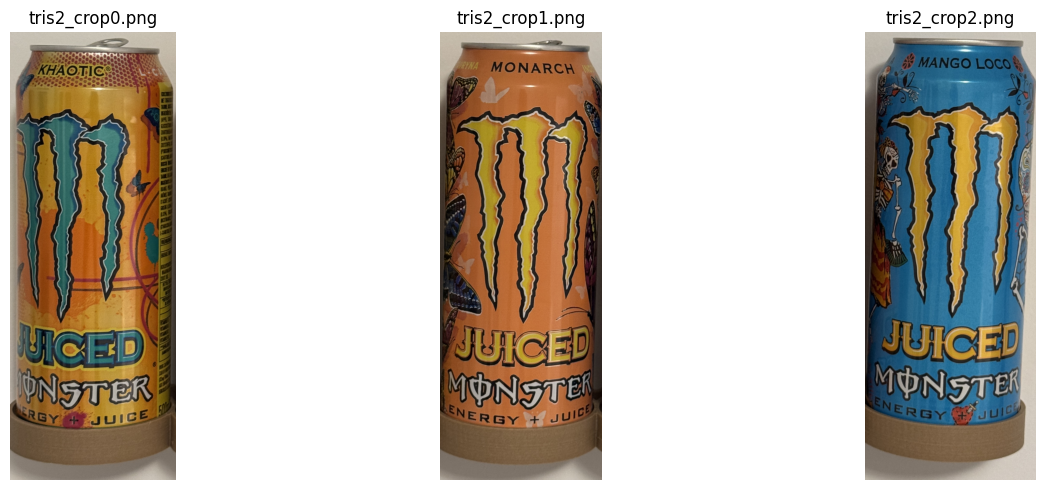

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Get the list of image files in the cropped_folder
image_files = [f for f in os.listdir(cropped_folder) if f.endswith(('png', 'jpg', 'jpeg'))]

# Display each image with its name side by side
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
for ax, image_file in zip(axes, image_files):
    image_path = os.path.join(cropped_folder, image_file)
    image = Image.open(image_path)
    
    ax.imshow(image)
    ax.set_title(image_file)
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

### Filters for text detection
All this filters are applied into the text_classification function and is choosen the best. 

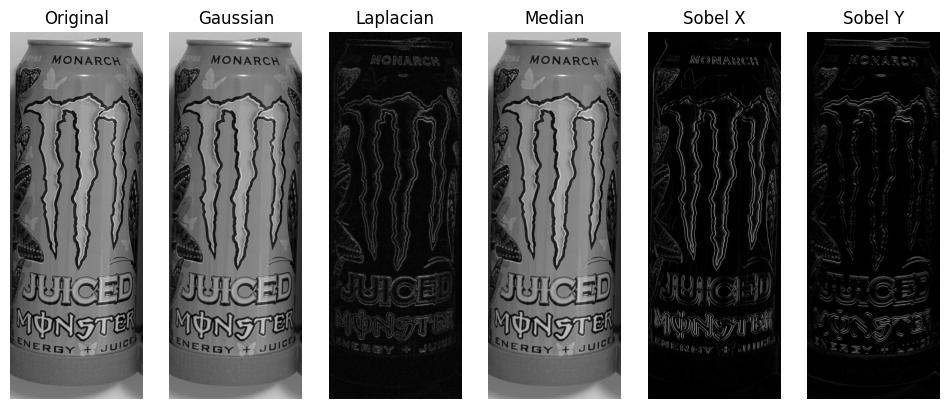

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def median_filter(data, filter_size):
    indexer = filter_size // 2
    data_padded = np.pad(data, indexer, mode='edge')  # Padding con replicazione dei bordi
    data_final = np.zeros_like(data)
    
    for i in range(len(data)):
        for j in range(len(data[0])):
            # Estrazione della finestra locale
            window = data_padded[i:i+filter_size, j:j+filter_size].flatten()
            data_final[i, j] = np.median(window)  # Calcolo della mediana
            
    return data_final

def apply_filters(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_gaussian = cv2.GaussianBlur(image, (5, 5), 0)
    filtered_laplacian = cv2.Laplacian(image, cv2.CV_64F)
    filtered_median = median_filter(image, 5)
    filtered_sobel_x = cv2.Sobel(filtered_median, cv2.CV_64F, 1, 0, ksize=5)
    filtered_sobel_y = cv2.Sobel(filtered_median, cv2.CV_64F, 0, 1, ksize=5)
    
    images = [image, filtered_gaussian, np.abs(filtered_laplacian), filtered_median, np.abs(filtered_sobel_x), np.abs(filtered_sobel_y)]
    titles = ["Original", "Gaussian", "Laplacian", "Median", "Sobel X", "Sobel Y"]
    
    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Esempio di utilizzo
apply_filters("/home/alejandro/Desktop/Projects/signals/MonsterRecognition/ImageCropped/tris2_crop1.png")


### Classification
Classify ceopped images based on their color using the function classify_data from color_class.py
Compare results with the ones obtained with text recognition.

In [7]:
# Define the path to the classification results file
classification_results_path = os.path.join(output_results, 'classification_results.txt')

# Load the classification results
with open(classification_results_path, 'r') as file:
    classification_results = file.read()

# Print the classification results
print("Classification Results:\n", classification_results)

Classification Results:
 
COLOR AND TEXT CLASSIFICATION RESULTS:
             Image      TextFilter        Text TextAccuracy Color Prediction  Color Accuracy
0  tris2_crop0.png  Original Image     KHAOTIC    77.142857          Khaotic           98.25
1  tris2_crop1.png  Original Image     MONARCH         90.0          Monarch           89.46
2  tris2_crop2.png  Original Image  MANGO LOCO         90.0       Mango Loco           98.31

MONSTER THAT YOU HAVE:
Khaotic
MONARCH
Mango Loco

MISSING MONSTER ARE:
nitro super dry, Zero Sugar, Lewis Hamilton, Ultra Citron, Java Triple Shot, tea lemonade, Aussie Lemonade, Ultra Fantasy Ruby Red, Pipeline Punch, ultra gold, Import, Pacific Punch, lo carb, ultra violet, ultra watermelon, nitro cosmic peach, MIXXD, MULE, ultra peachy keen, Original green, Ultra Paradise, Orange Dreamsicle, java salted caramel, Ultra Fiesta Mango, Assault, Ultra, Super Fuel, Rehab Peach Tea, Espresso, ultra blue, ultra red, ultra rosa, ultra sunrise, ultra strawberry 